# Posterior Approximation for a Binomial model

Let the probability density function for binomial distribution: $P(y | n, p) = {n \choose y} p^{y}(1-p)^{(n-y)} $

Where $n$ is the **number of trials**, p **probability of success** and $y$ the **number of successes in $n$ trials**.

We can express this probability density function as an exponential model :

$$P(y | n, \theta) = exp[y \theta - n log(1 + e^{\theta}) + log{n \choose y}] $$

And then express the posterior distribution of $\theta$ for a Binomial model:

$$P(\theta | y, n) \propto P(y | n, \theta) p(\theta) = exp[y \theta - n log(1 + e^{\theta}) + log{n \choose y}] P(\theta)$$


Where $\theta = log(\frac{p}{1 - p})$ and conversely $p = \frac{e^{\theta}}{1 + e^{\theta}}$ 




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from math import exp
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    theta = [d[0] for d in data]
    data_frame = pd.DataFrame({'theta': theta})
    return data_frame

def extract_from_file_mh(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    p = [d[1] for d in data]
    data_frame = pd.DataFrame({'p': p})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'theta': [theta[1] for theta in data2['theta'].items() if theta[0] % 10 == 0]})
    return data_frame

def theta_to_p(theta):
    return exp(theta)/(1 + exp(theta))

def summary_mh(data):
    print("========== Q1 ==========")
    q_25 = np.percentile(data['p'], 25)
    print("Q1 for p parameter {}".format(q_25))
    print("========== Median ==========")
    q_50 = np.percentile(data['p'], 50)
    print("Median for p parameter {}".format(q_50))
    avg = np.mean(data['p'])
    print("========== Mean ==========")
    print("Mean for p parameter {}".format(avg))
    q_75 = np.percentile(data['p'], 75)
    print("========== Q3 ==========")
    print("Q3 for p parameter {}".format(q_75))

def summary_abc(data):
    print("========== Q1 ==========")
    q_25 = np.percentile(data['theta'], 25)
    print("Q1 for theta parameter {}".format(q_25))
    print("Q1 for theta -> p parameter {}".format(theta_to_p(q_25)))
    print("========== Median ==========")
    q_50 = np.percentile(data['theta'], 50)
    print("Median for theta parameter {}".format(q_50))
    print("Median for theta -> p parameter {}".format(theta_to_p(q_50)))
    avg = np.mean(data['theta'])
    print("========== Mean ==========")
    print("Mean for theta parameter {}".format(avg))
    print("Mean for theta -> p parameter {}".format(theta_to_p(avg)))
    q_75 = np.percentile(data['theta'], 75)
    print("========== Q3 ==========")
    print("Q3 for theta parameter {}".format(q_75))
    print("Q3 for theta -> p parameter {}".format(theta_to_p(q_75)))


def plot_marginals(data_mh, data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    fig, axs = plt.subplots(2, 2, figsize=(14,14))
    
    # ABC
    
    # From theta parameter to p parameter
    p_abc = [theta_to_p(t) for  t in data_abc['theta'].tolist()[burn_in::by]]
    
    # Distribution
    sns.distplot(p_abc, axlabel="p distribution ABC", ax=axs[0,0])
    
    # Path
    axs[1,0].plot(range(len(p_abc)),p_abc)
    axs[1,0].set(xlabel='iterations', ylabel='p parameter ABC')
    
    # MH
    
    # Distribution
    p_mh = data_mh['p'].tolist()[burn_in::by]
    sns.distplot(p_mh, axlabel="p distribution MH", ax=axs[0,1])

    # Path
    axs[1,1].plot(range(len(p_mh)),p_mh)
    axs[1,1].set(xlabel='iterations', ylabel='p parameter MH')
    


def comparaison(data_mh, data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1

    fig, axs = plt.subplots(2, 1, figsize=(14,14))
    l_abc = data_abc["theta"].tolist()[burn_in::by]
    p_mh = data_mh['p'].tolist()[burn_in::by]
    p_abc = [theta_to_p(t) for t in l_abc]
    
    df_mean = pd.DataFrame({"p MH": p_mh , "p ABC" : p_abc})
    
    axs[0].set_title(label="Binomial distribution - mean parameter")
    sns.boxplot(data=df_mean, ax=axs[0])
    
    p_mh.sort()
    p_abc.sort()
    axs[1].scatter(p_mh, p_abc)
    axs[1].set(xlabel="MH sampler", ylabel="ABC sampler", label="Binomial distribution - qq plot (p parameter)")

    plt.show()

    
def autocor(data_mh, data_abc, burn_in=None, by=None):
    if burn_in is None:
        burn_in = 0
    
    if by is None:
        by=1
    
    fig, axs = plt.subplots(3, 1, sharex='col', sharey='row', figsize=(14,21)) 
    l_abc = data_abc["theta"].tolist()[burn_in::by]
    p_mh = data_mh['p'].tolist()[burn_in::by]
    p_abc = [theta_to_p(t) for t in l_abc]
    
    plot_acf(p_mh, ax=axs[0])
    axs[0].set_title("Autocorrelation for p parameter (MH)")
    
    plot_acf(l_abc, ax=axs[1])
    axs[1].set_title("Autocorrelation for theta parameter (ABC)")
    
    plot_acf(p_abc, ax=axs[2])
    axs[2].set_title("Autocorrelation for p parameter (ABC)")


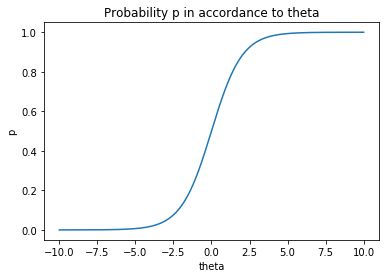

In [3]:
x = np.arange(-10,10, 0.001)
y = [exp(t)/(1 + exp(t)) for  t in x]
fig, ax = plt.subplots()
ax.set(xlabel='theta', ylabel='p',
       title='Probability p in accordance to theta')
ax.plot(x,y)


# First results : 100 000 iterations 


### MH settings
* sample size : $size=1$
* $p_0 = \frac{e^{10}}{1 + e^{10}} \approx 0.999$
* $p_{true} = \frac{e^{0}}{1 + e^{0}} = 0.5$
* $y \sim Bin(n = 100, p_{true})$
* $\Delta=[0.005]$
* Number of samples: $n=100000$
* $n_{algo} = 100$

### ABC settings
* sample size : $size=1$
* $theta_0 = [10]$
* $y \sim Bin(n = 100, p = \frac{e^{0.2}}{1 + e^{0.2}})$
* $\Delta=[0.005]$
* Number of samples: $n=10000$
* Shadow chain length: $n_{shadow} = 200$

In [18]:
FILE_NAME_0 = 'assets/mh_samples/binom_mh_100000.json'
data0 = extract_from_file_mh(FILE_NAME_0)

In [19]:
summary_mh(data0)

========== Q1 ==========
Q1 for p parameter 0.49495403132374505
========== Median ==========
Median for p parameter 0.5284102594005371
========== Mean ==========
Mean for p parameter 0.5280985623523888
========== Q3 ==========
Q3 for p parameter 0.5611465707638424


In [20]:
FILE_NAME_1 = 'assets/abc_samples/binom_abc_100000.json'
data1 = extract_from_file(FILE_NAME_1)

In [21]:
summary_abc(data1)

========== Q1 ==========
Q1 for theta parameter -0.037235641382169025
Q1 for theta -> p parameter 0.49069216506693036
========== Median ==========
Median for theta parameter 0.11935958689419995
Median for theta -> p parameter 0.5298045204235875
========== Mean ==========
Mean for theta parameter 0.12072925940226314
Mean for theta -> p parameter 0.530145707876147
========== Q3 ==========
Q3 for theta parameter 0.2756318036618449
Q3 for theta -> p parameter 0.5684749786787161


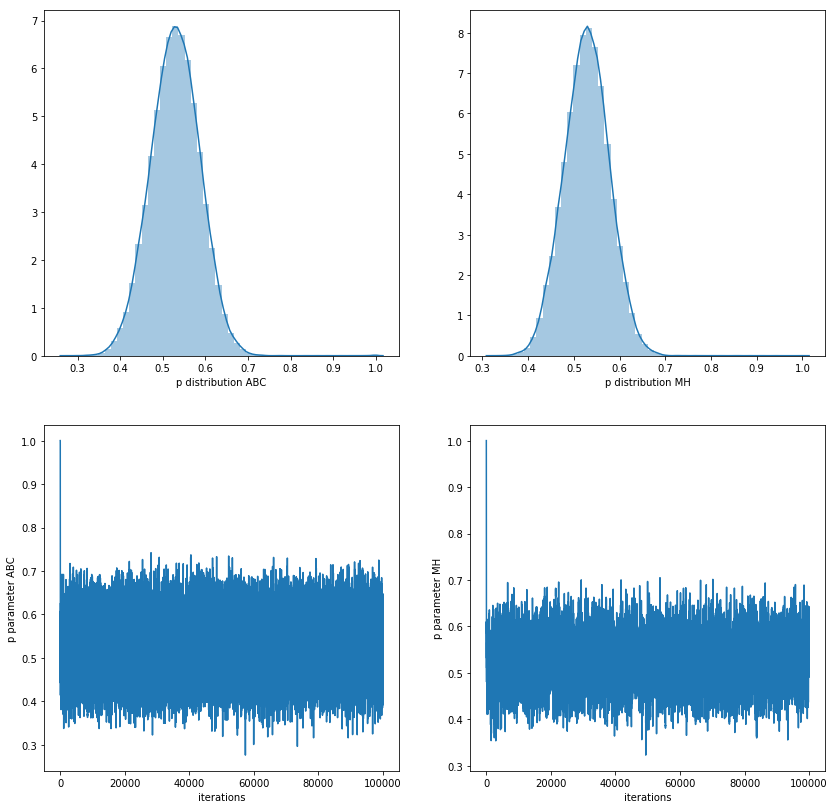

In [22]:
plot_marginals(data0,data1)

## Comparaison

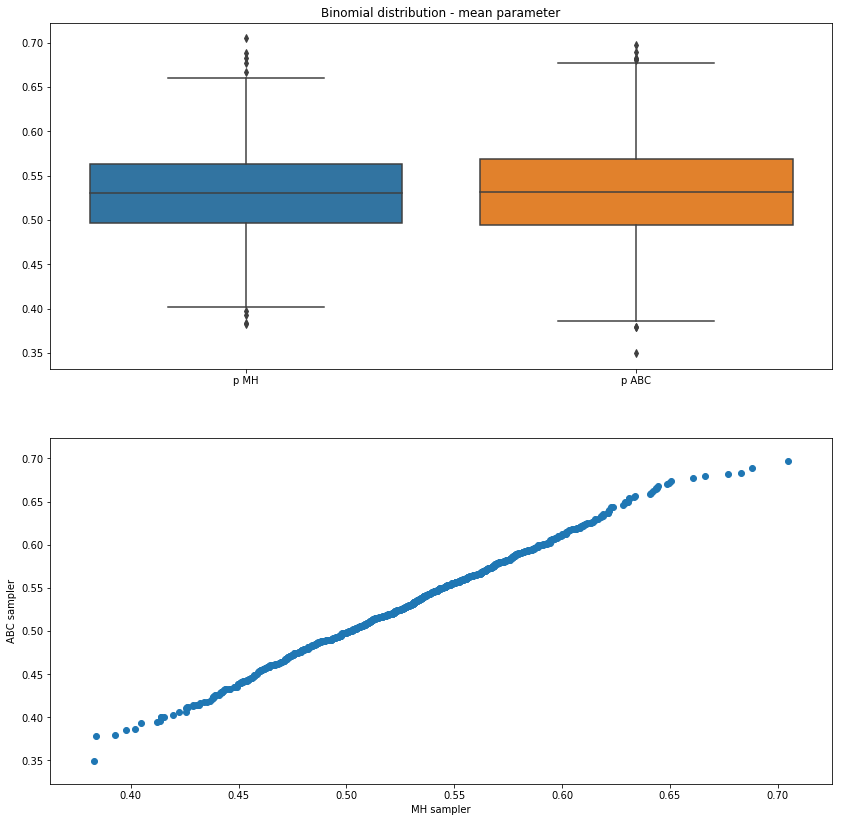

In [23]:
comparaison(data0, data1, burn_in=2000, by=100)

## Autocorrelation

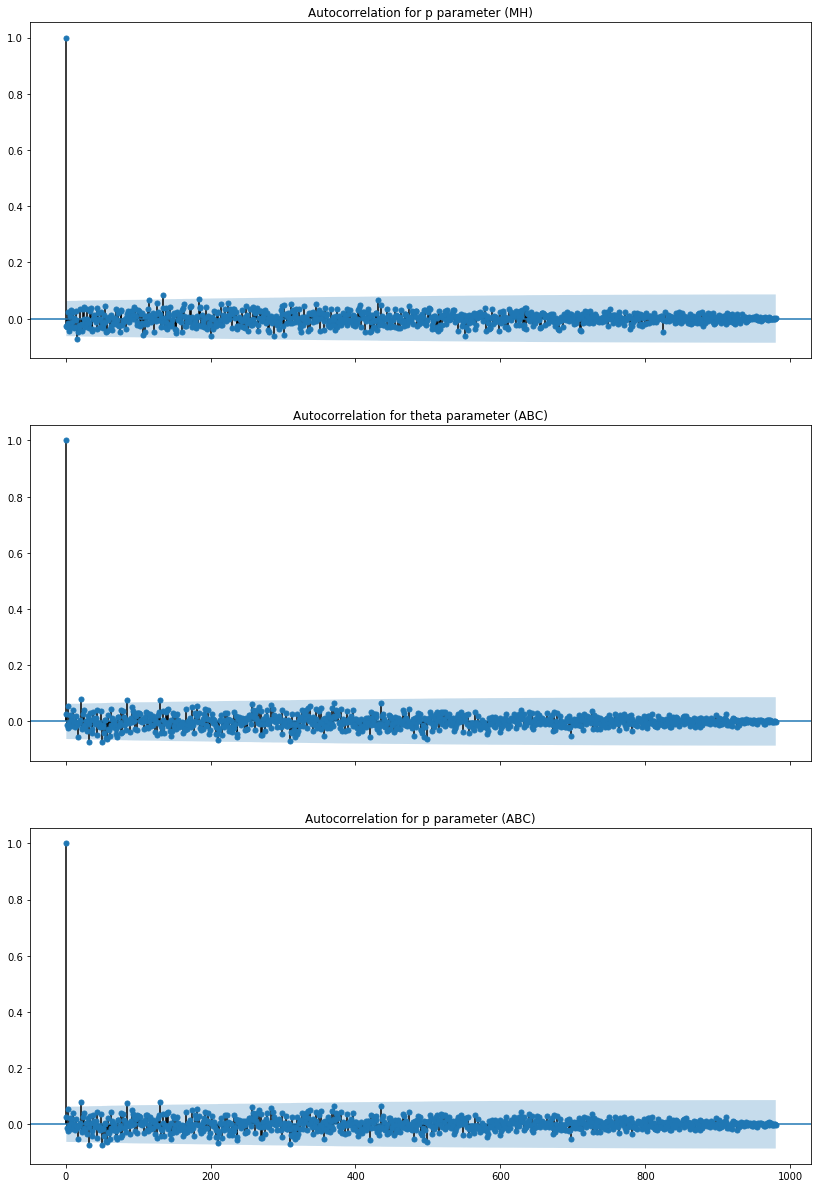

In [28]:
autocor(data0, data1, burn_in=2000, by=100)